In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

%matplotlib inline

In [2]:
df = pd.read_csv('bitcoin_model_data_nyt.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
df.head()

,totalArticles,daily_return,volume_change,spread,joy,fear,sadness,tentative,analytical,confident,anger,crossover_signal,vol_trend_signal,bollinger_signal,close,positive_return
date,,,,,,,,,,,,,,,,
2020-05-08,1.0,-0.019148,-0.462646,0.032066,0.0,0.0,0.538156,0.744949,0.961740,0.00000,0.0,0.0,0.0,0.0,9809.5,0.0
2020-05-12,1.0,0.029507,-0.597957,0.051710,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,-1.0,0.0,0.0,8823.7,1.0
2020-06-22,1.0,0.044083,1.600444,0.054391,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,9694.0,1.0
2020-06-25,1.0,-0.005225,0.051709,0.037145,0.0,0.0,0.000000,0.000000,0.921396,0.83356,0.0,-1.0,0.0,0.0,9233.5,0.0
2020-07-15,1.0,-0.006182,0.071838,0.012708,0.0,0.0,0.000000,0.908434,0.748316,0.00000,0.0,-1.0,1.0,0.0,9195.0,0.0


In [3]:
start_date = '2020-10-30'
end_date = df.index.max().strftime(format= '%Y-%m-%d')

In [4]:
df_2 = df[start_date:end_date]
df_2.head()

,totalArticles,daily_return,volume_change,spread,joy,fear,sadness,tentative,analytical,confident,anger,crossover_signal,vol_trend_signal,bollinger_signal,close,positive_return
date,,,,,,,,,,,,,,,,
2020-10-30,5.0,0.007717,0.165422,0.041145,0.0,0.0,0.000000,0.668336,0.000000,0.0,0.0,1.0,-1.0,-1.0,13567.0,1.0
2020-10-31,1.0,0.017845,-0.183336,0.048242,0.0,0.0,0.576203,0.000000,0.000000,0.0,0.0,1.0,1.0,-1.0,13809.1,1.0
2020-11-01,1.0,-0.003375,-0.564168,0.019277,0.0,0.0,0.000000,0.672523,0.000000,0.0,0.0,1.0,1.0,-1.0,13762.5,0.0
2020-11-02,2.0,-0.014292,1.237562,0.045173,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,-1.0,13565.8,0.0
2020-11-03,1.0,0.033614,-0.021746,0.055851,0.0,0.0,0.000000,0.000000,0.822162,0.0,0.0,1.0,-1.0,-1.0,14021.8,1.0


In [5]:
 # Creating the X and y sets
X = df_2.iloc[:, 0:15].values
y = df_2["positive_return"].values

In [6]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [7]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=78)

In [8]:
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# Model set-up
number_input_features = 15
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5

In [10]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Layer 3
model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

In [11]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [12]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Training the model
batch_size = 1000
epochs = 50
model_training = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.6923 - accuracy: 0.6000 - tp: 29.0000 - tn: 1.0000 - fp: 20.0000 - fn: 0.0000e+00 - precision: 0.5918 - recall: 1.0000 - auc: 0.5066 - val_loss: 0.6191 - val_accuracy: 0.7647 - val_tp: 13.0000 - val_tn: 0.0000e+00 - val_fp: 4.0000 - val_fn: 0.0000e+00 - val_precision: 0.7647 - val_recall: 1.0000 - val_auc: 0.3846
Epoch 2/50
1/1 [==============================] - 0s 43ms/step - loss: 0.6871 - accuracy: 0.6000 - tp: 29.0000 - tn: 1.0000 - fp: 20.0000 - fn: 0.0000e+00 - precision: 0.5918 - recall: 1.0000 - auc: 0.5213 - val_loss: 0.6186 - val_accuracy: 0.7647 - val_tp: 13.0000 - val_tn: 0.0000e+00 - val_fp: 4.0000 - val_fn: 0.0000e+00 - val_precision: 0.7647 - val_recall: 1.0000 - val_auc: 0.3846
Epoch 3/50
1/1 [==============================] - 0s 50ms/step - loss: 0.6820 - accuracy: 0.6200 - tp: 29.0000 - tn: 2.0000 - fp: 19.0000 - fn: 0.0000e+00 - precision: 0.6042 - recall: 1.0000 - auc: 0.5419 - val_loss: 0.6183 -

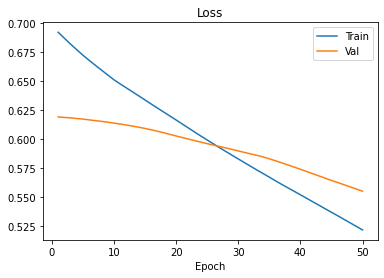

In [14]:
 # Plotting loss
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": model_training.history["loss"],
        "Val": model_training.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

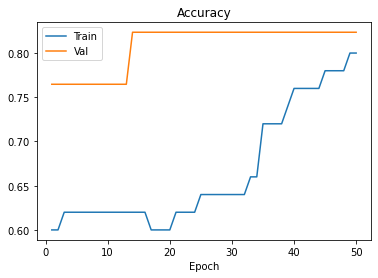

In [15]:
# Plotting accuracy
accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": model_training.history["accuracy"],
        "Val": model_training.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

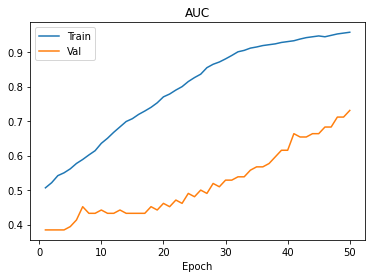

In [16]:
 # Plotting AUC
auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": model_training.history["auc"],
        "Val": model_training.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC")

In [17]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics = {k: v for k, v in zip(model.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)

{'loss': 0.5756009817123413,
 'accuracy': 0.739130437374115,
 'tp': 14.0,
 'tn': 3.0,
 'fp': 5.0,
 'fn': 1.0,
 'precision': 0.7368420958518982,
 'recall': 0.9333333373069763,
 'auc': 0.7875000238418579}

In [19]:
 # Define the confusion matrix data
cm_df = pd.DataFrame(
    {
        "Positive (1)": [f"TP={metrics['tp']}", f"FP={metrics['fn']}"],
        "Negative (0)": [f"FN={metrics['fp']}", f"TN={metrics['tn']}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_df.index.name = "Actual"
cm_df.columns.name = "Predicted"

# Show the confusion matrix
cm_df

Predicted,Positive (1),Negative (0)
Actual,,
Positive(1),TP=14.0,FN=5.0
Negative(0),FP=1.0,TN=3.0


In [20]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Predict classes using testing data
y_predict_classes = model.predict_classes(X_test, batch_size=1000)

# Display classification report
print(classification_report(y_predict_classes, y_test))

              precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.93      0.74      0.82        19

    accuracy                           0.74        23
   macro avg       0.65      0.74      0.66        23
weighted avg       0.84      0.74      0.77        23

